In [196]:
import pandas as pd
import numpy as np
import sklearn

train = pd.read_csv("character-deaths.csv")
train.loc[train["Death Year"].notnull(), "Death Year"] = 1
train["Death Year"] = train["Death Year"].fillna(0)
train["Book of Death"] = train["Book of Death"].fillna(0)
train["Death Chapter"] = train["Death Chapter"].fillna(0)
train["Book Intro Chapter"] = train["Book Intro Chapter"].fillna(0)
train = train.drop(columns=['Book of Death', 'Death Chapter',"Name"])
train = pd.get_dummies(train, columns = ['Allegiances'])
train


,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Allegiances_Arryn,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,0.0,56.0,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,49.0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,5.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,20.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.0,21.0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,1.0,47.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
914,1.0,25.0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
915,1.0,73.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [197]:
from sklearn.model_selection import train_test_split

print('total rows and columns:',train.shape)
x = train.drop(columns=["Death Year"])
y = train["Death Year"]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=0)
print('train_set:', len(x_train), 'validation_set:' ,len(x_test))

total rows and columns: (917, 30)
train_set: 687 validation_set: 230


[Text(193.34126712328768, 203.85, 'X[6] <= 0.5\nentropy = 0.903\nsamples = 687\nvalue = [468, 219]'),
 Text(125.26335616438357, 176.67000000000002, 'X[7] <= 0.5\nentropy = 0.965\nsamples = 492\nvalue = [300, 192]'),
 Text(71.66095890410959, 149.49, 'X[23] <= 0.5\nentropy = 0.999\nsamples = 339\nvalue = [176, 163]'),
 Text(34.397260273972606, 122.31, 'X[21] <= 0.5\nentropy = 0.994\nsamples = 237\nvalue = [108, 129]'),
 Text(29.81095890410959, 95.13, 'X[20] <= 0.5\nentropy = 0.99\nsamples = 231\nvalue = [102, 129]'),
 Text(18.345205479452055, 67.94999999999999, 'X[26] <= 0.5\nentropy = 0.978\nsamples = 199\nvalue = [82, 117]'),
 Text(9.172602739726027, 40.77000000000001, 'X[25] <= 0.5\nentropy = 0.968\nsamples = 190\nvalue = [75, 115]'),
 Text(4.586301369863014, 13.590000000000003, 'entropy = 0.973\nsamples = 186\nvalue = [75, 111]'),
 Text(13.758904109589041, 13.590000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(27.517808219178082, 40.77000000000001, 'X[4] <= 0.5\nent

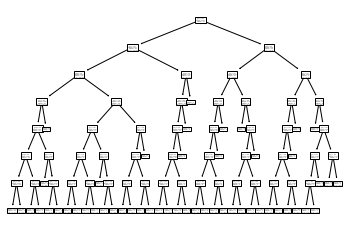

In [213]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter = 'best')
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

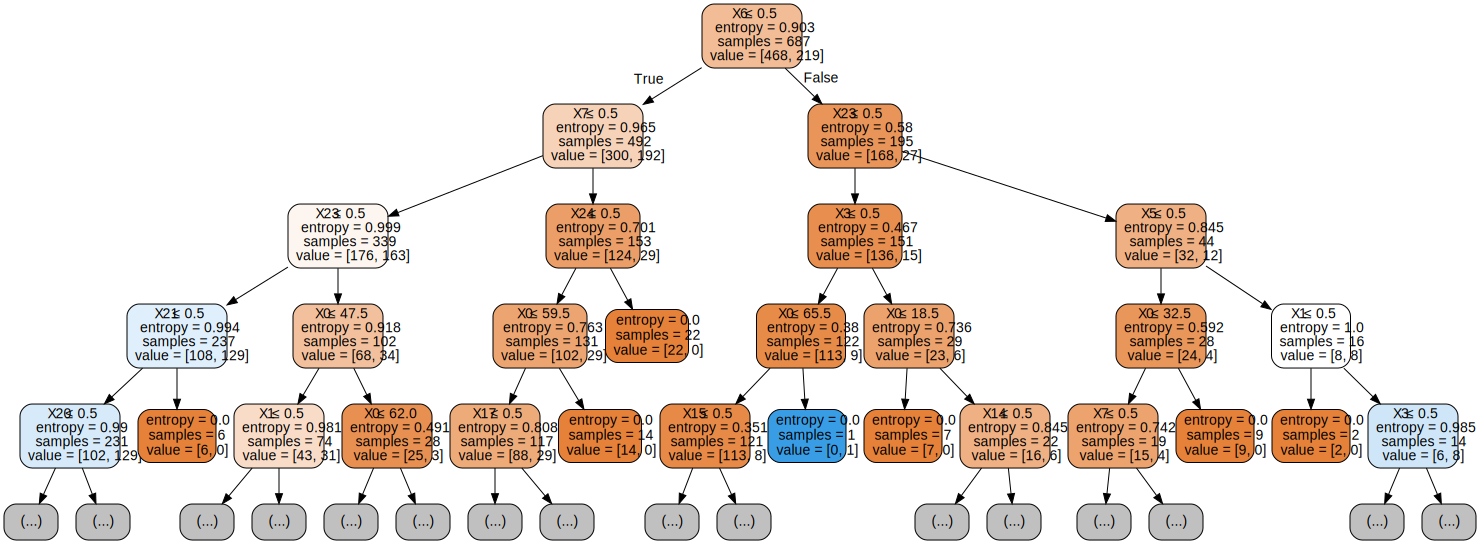

In [221]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth = 4,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 
graph  




In [215]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_predicted))

Confusion Matrix:
 [[107  37]
 [ 36  50]]


In [216]:
from sklearn.metrics import accuracy_score
y_predicted = clf.predict(x_valid)

print('score: ', accuracy_score(y_valid, y_predicted, normalize=True, sample_weight=None))

score:  0.6826086956521739


In [217]:
from sklearn.metrics import average_precision_score, precision_score, recall_score
print("precision_score: ", precision_score(y_valid, y_predicted))
print("recall_score: ", recall_score(y_valid, y_predicted))

precision_score:  0.5714285714285714
recall_score:  0.6046511627906976
